W0825 12:14:59.228156 140607581415168 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


Time: 374.141 [ms] / FPS: 26.7


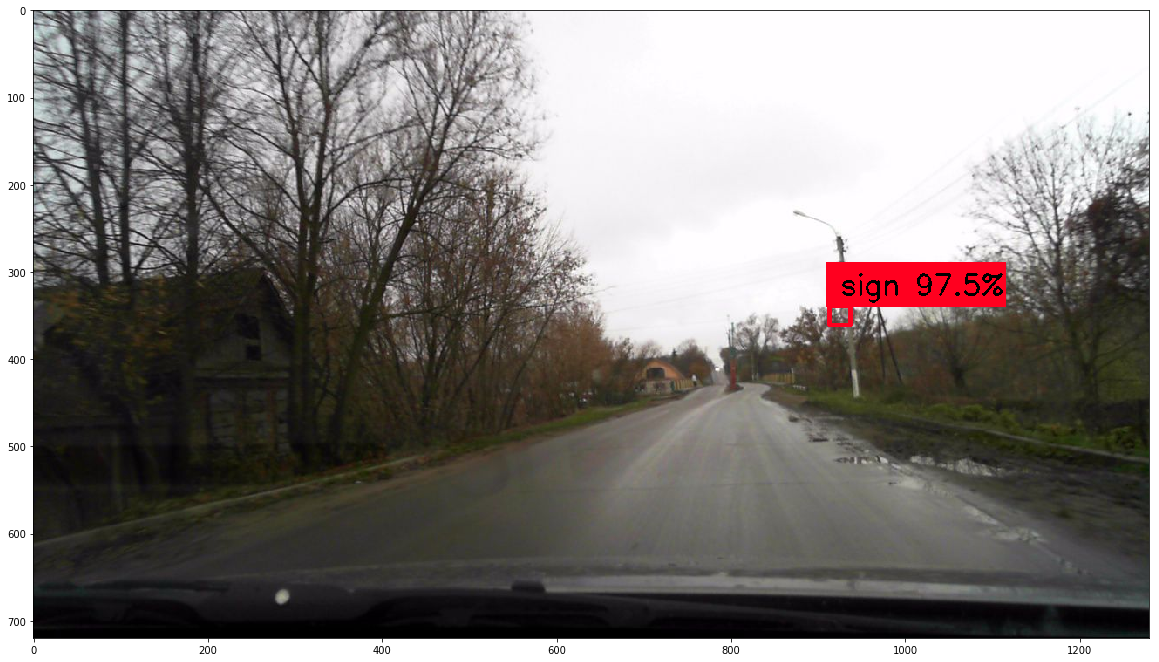

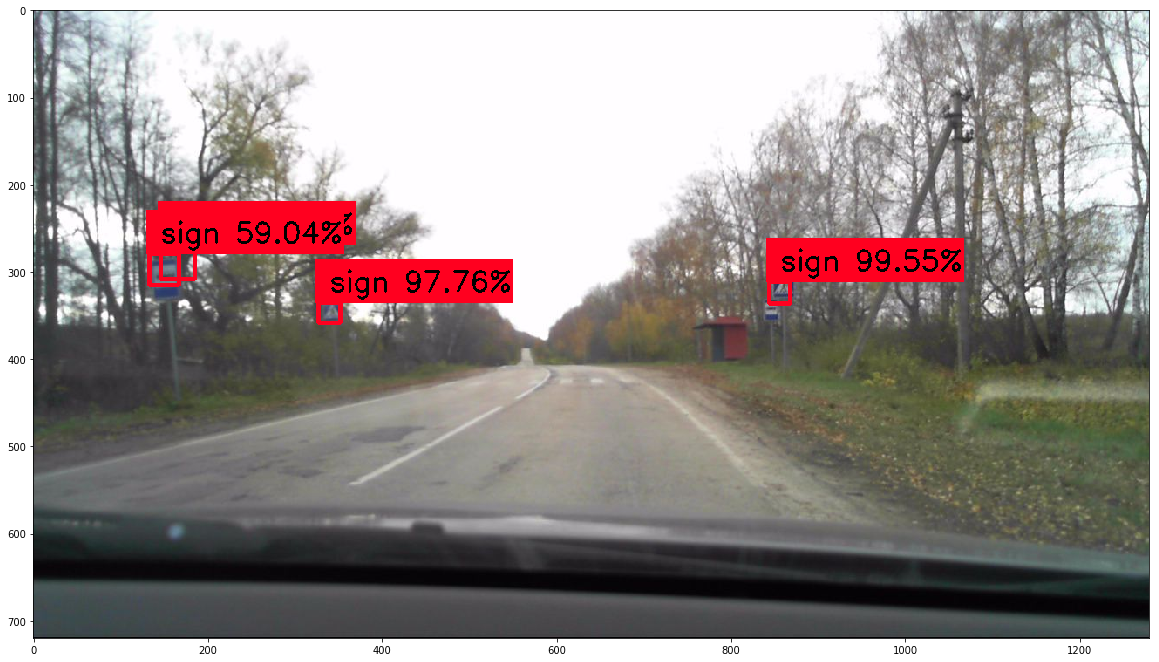

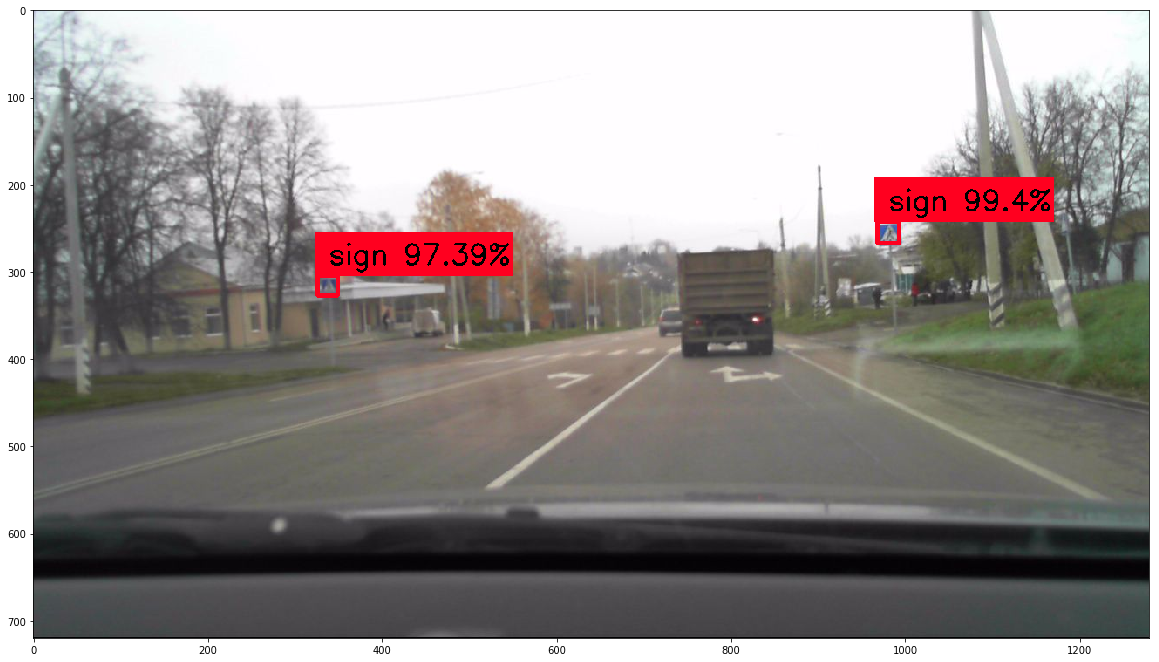

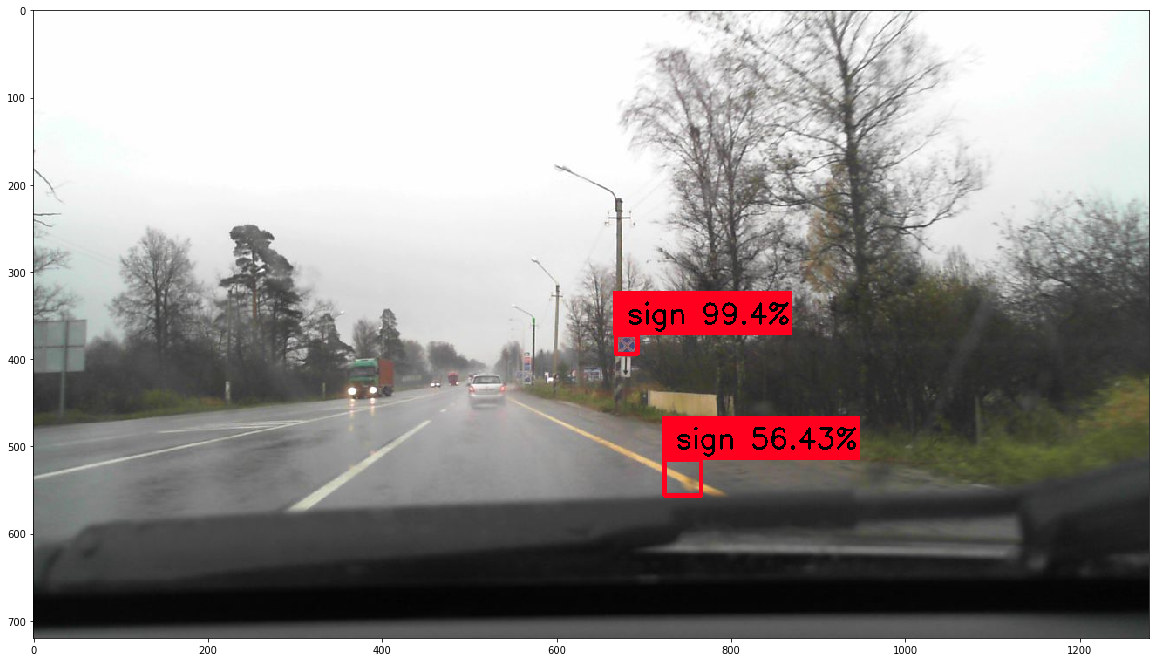

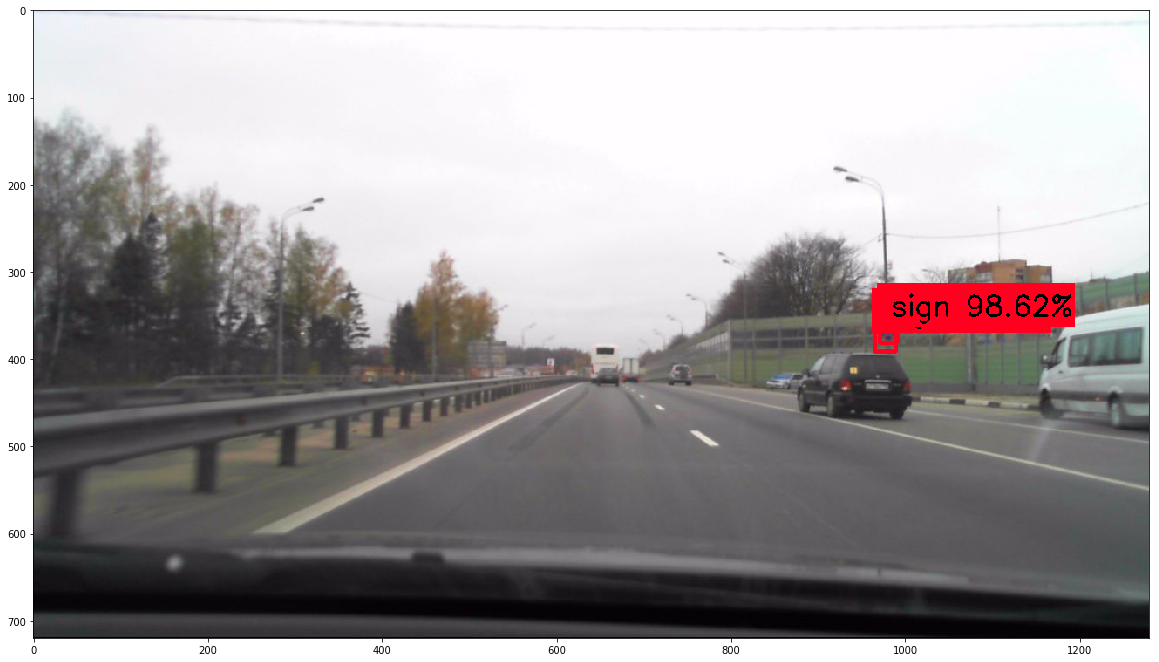

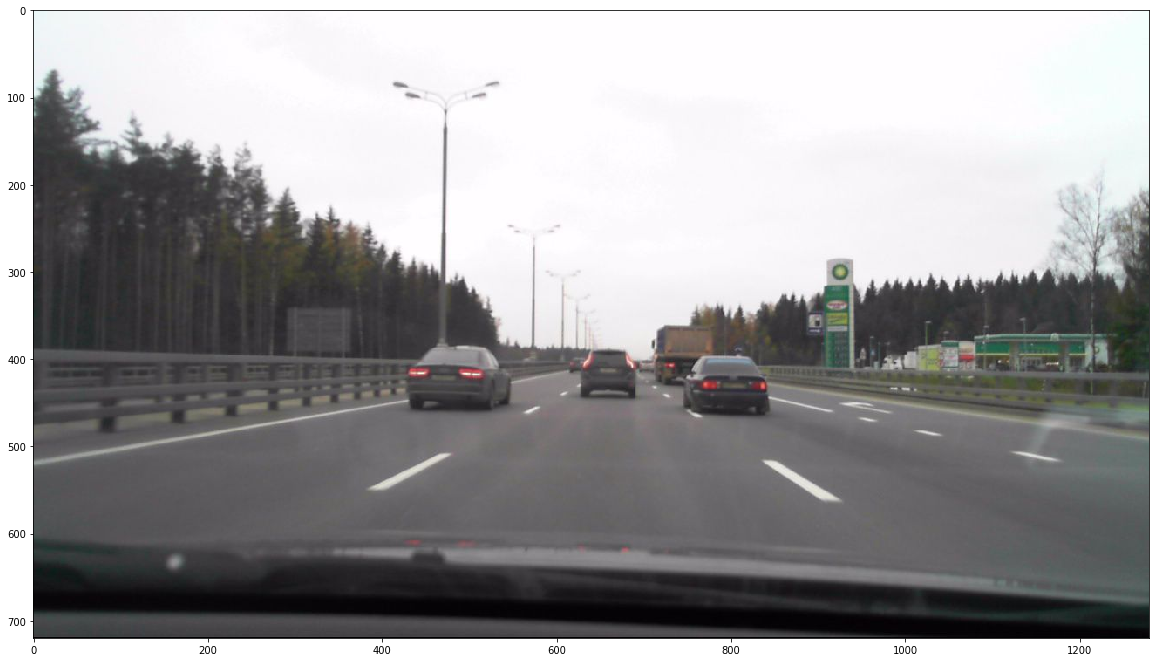

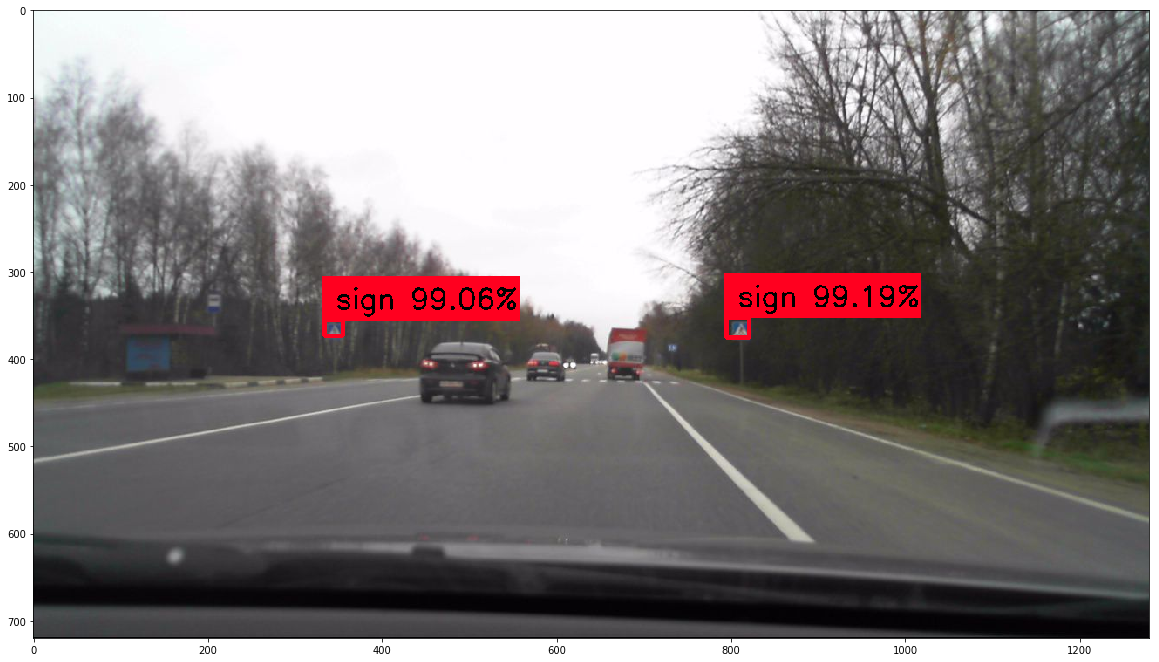

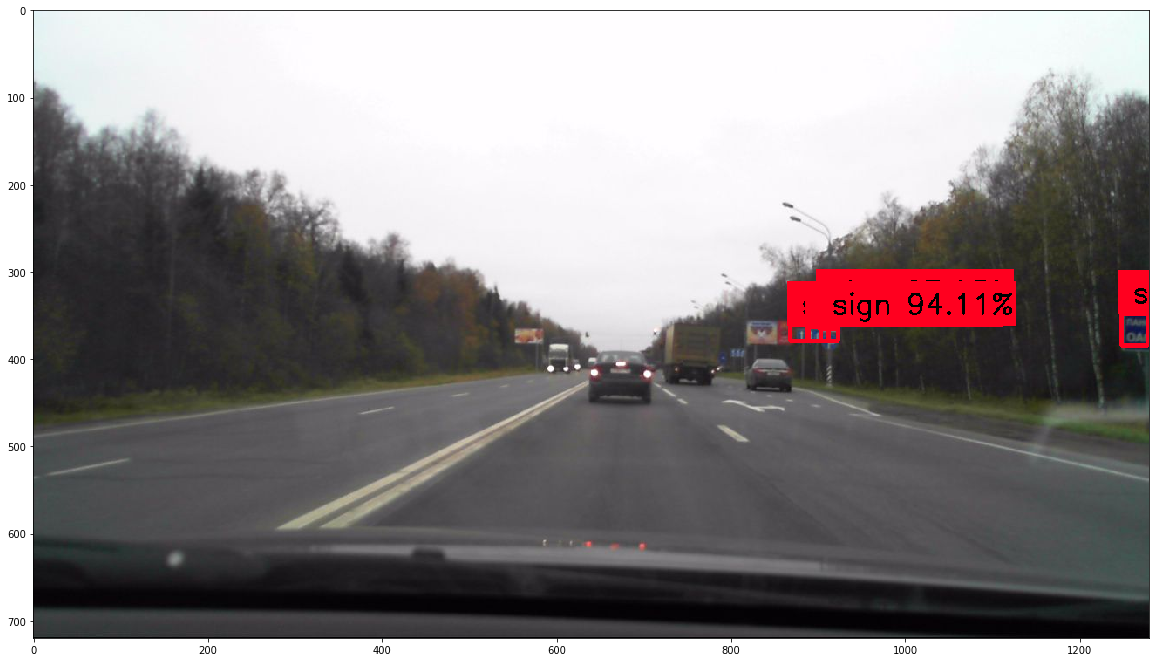

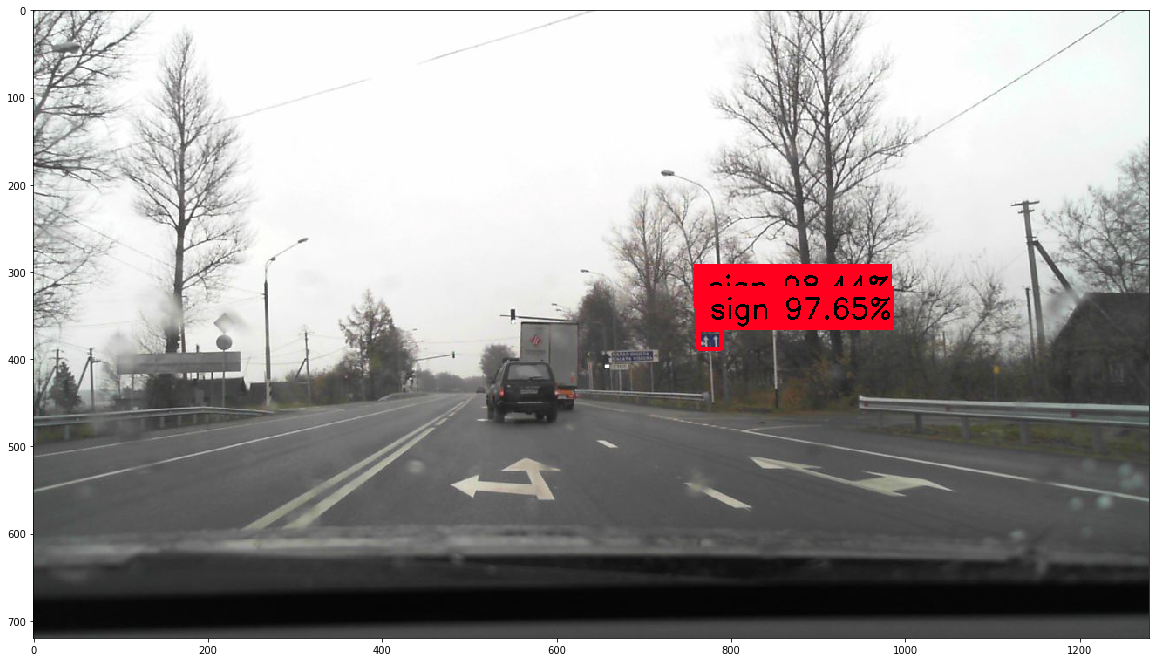

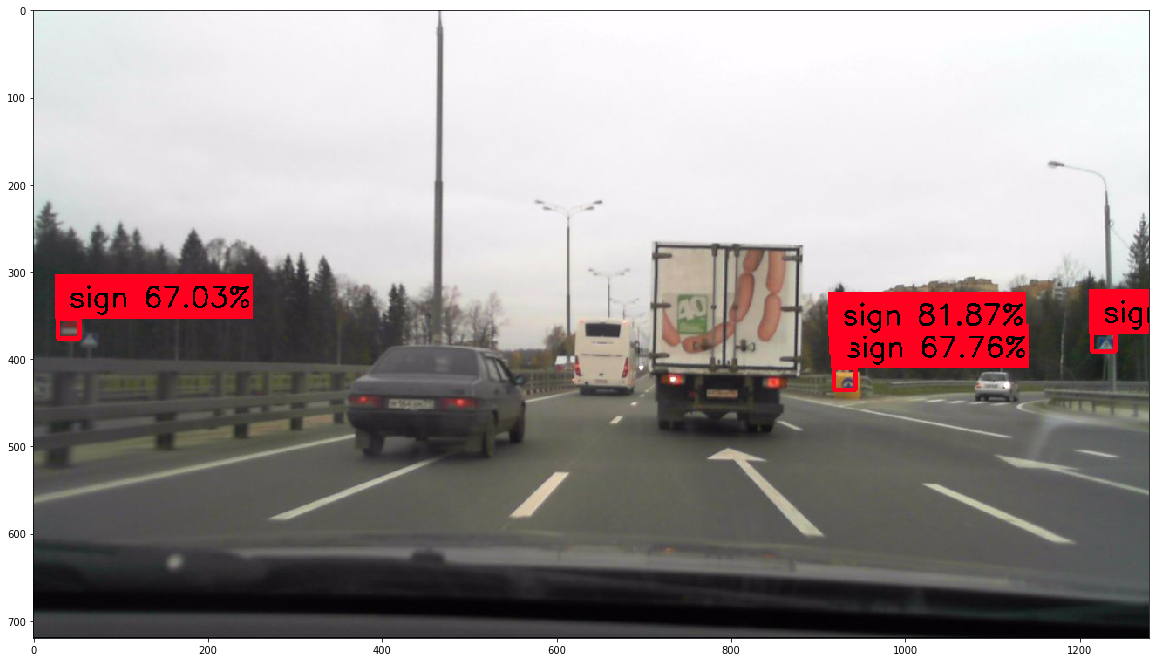

In [3]:
import time
import cv2
import argparse
from _common import utils
import json
from utils.utils import get_yolo_boxes, preprocess_input
from utils.bbox import draw_boxes
from tensorflow.python.keras.models import load_model

import matplotlib.pyplot as plt
import cv2
from utils.utils import preprocess_input
import numpy as np
%matplotlib inline

config_path = 'cfgs/signs_small_tiny_v3.json'
weights_path = 'best/TSD_Small_YOLOv3_Tiny_SmallTinyV3_416x416_ep028-val_loss4.293-best_mAP0.492.h5'

with open(config_path) as config_buffer:    
    config = json.load(config_buffer)

input_path = config['eval']['image_folder'][0]

labels = ['sign']
anchors = config['model']['anchors']

net_h, net_w = config['model']['infer_shape']
obj_thresh, nms_thresh = 0.5, 0.45

model = load_model(weights_path)

data_generator = utils.data_generator(input_path, shuffle=True, cnt_limit=10)

full_time = 0
processing_cnt = 0
skip = 0

def cv_imshow(cv_img):
    cv_img = cv_img.astype(np.uint8)
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_img)

for type, image_src in data_generator:

    image = image_src.copy()
    
    start = time.time()

    # print(image_src.shape)
    # image = cv2.resize(image_src, (0,0), fx=2, fy=2)

#     n_image = utils.normalize_ycrcb(image)
#     boxes = get_yolo_boxes(model, [n_image], net_h, net_w, anchors, obj_thresh, nms_thresh)[0]

    boxes = get_yolo_boxes(model, [image], net_h, net_w, anchors, obj_thresh, nms_thresh)[0]
    
    full_time += time.time() - start
    processing_cnt += 1

    draw_boxes(image, boxes, labels, obj_thresh) 
#     draw_boxes(n_image, boxes, labels, obj_thresh) 

    if skip or type == utils.DATA_GEN_SRC_VIDEO:
        show_delay = 1
    else:
        show_delay = 0

    plt.figure(figsize=(20,20))
    cv_imshow(image)

print("Time: %.3f [ms] / FPS: %.1f" % (full_time * 1000, processing_cnt / full_time))